## Final Project Report for CS 184A/284A, Fall 2023

__Project Title:__ Fetus Health Classification
<br>
__Project Number:__ 12
<br>
<br>
__Student Name(s)__
<br>
Sharvin Joshi, 49481100, sharvimj@uci.edu
<br>
Jeffrey Wang, 83329245, jeffrw20@uci.edu

### 1. Introduction and Project Statement
Our project focuses on diagnosing the health of fetus though analyzing data gathered from feti to determine if a  fetus is infected with some sort of disease. This can potentially be helpful in early diagnoses of diseases in fetuses to prevent maternal mortality; 94% of the 295,000 deaths (as of 2017) during and following pregnancy and childbirth could have been prevented if the fetus was correctly diagnosed. Each datapoint has 21 features like heartrate, fetus movements, acceleration, and deceleration. With each datapoint, there is a diagnostic given by three experts that falls into one of three categories: normal health, are suspected of carrying disease, or are confirmed to be carrying a pathological disease; We would be predicting one of the multi-class labels base off the 2126 datapoints from Kaggle.

### 2. Related Work
On Kaggle, there have been other submissions that uses a multitude of multiclass classifier models to solve the problem including Logistic Regression, Decision Trees, Random Forest, Naive Bayes, and more. With this assorted methods of classification for this problem, we wanted to try if Knn proves to be a much too simple methodology. On top of that, we wanted to see if a Multi-layer Perceptron(MLP) would be much more accurate than Knn. 

Other previous works includes this relatively recent article "[Fetal Health Classification from Cardiotocograph for Both Stages of Labor—A Soft-Computing-Based Approach](https://www.mdpi.com/2075-4418/13/5/858)" where it also recognizes the difficulty on using cardiotocography (recording of the fetal heartbeat and the uterine contractions during pregnancy) data from the first stage and the second stage of labor. In this article, they used standard classification methods like Support Vector Machines(SVM) and Random Forest(RF) and achieved 97.5% and 98% accuracy on prediction for the first stage of labor. In second stage of labor, SVM and RF's performance became 90.6% and 89.3% respectively. Although this paper's MLP performed less well than its RF and SVM models, we wanted to try if there are other configuration of MLP with out dataset that can improve upon their performances.


### 3. Dataset
Our dataset comes from the Kaggle competition [Fetal Health Classificatoin](https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification), where 2126 datapoints are given with 21 features that was classified by three experts to categorize each datapoint into one of three labels: Normal, Suspect, and Pathological.

There are quite a number of features in the dataset that isn't exactly clear to us, for instance the "histogram" it is referring to isn't explained in the Kaggle competition. So we wanted to see how relevant with their contribution to the prediction compare to other features that seem to have more relevance on the surface level: features like heart rates, acceleration, and deceleration.

#### Here are some graphical representation for all features.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv("C:\\Users\\jeffr\\Desktop\\CS184A\\Project\\FetusHealthML\\Project\\fetal_health.csv")
display(df)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


#### Histograms of all features

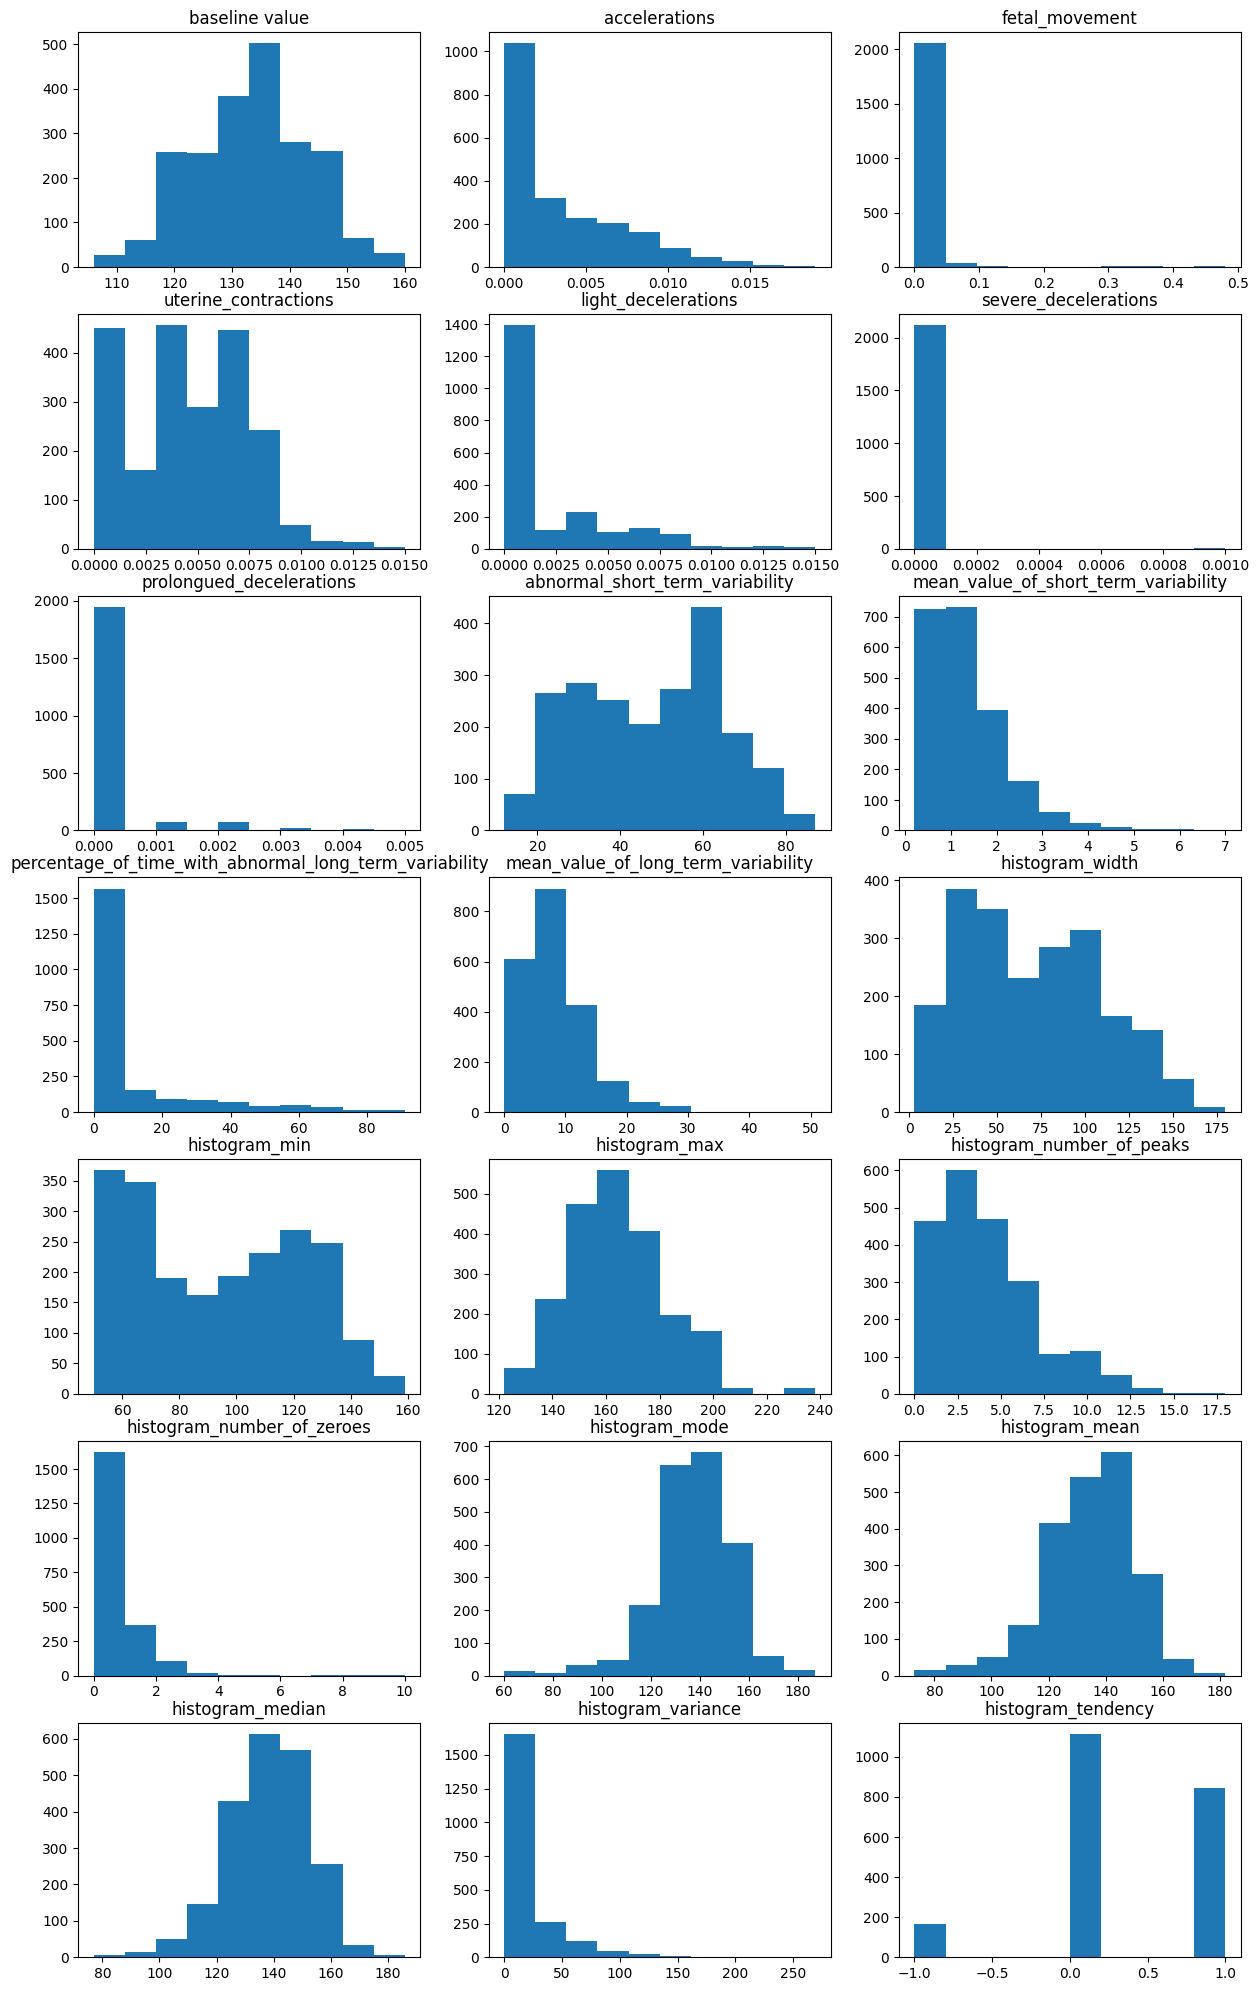

In [15]:
fig, ax = plt.subplots(7,3,figsize=(15,25))

for i, features in enumerate(df):
    if i == 21:
        break
    ax[i//3][i%3].hist(df[features])
    ax[i//3][i%3].title.set_text(features)
plt.show()

#### 

### 4. Description of Technical Approach

##### Overview
&emsp;&emsp;For our attempt at making a machine learning(ML) model to predict fetus health, we decided to use K-Nearest Neighbor algorithm(KNN) and Multi-Layer Perceptron(MLP) algorithm. At our first glance at the dataset, we thought that the first seven features(Baseline Fetal Heart Rate, number of accelerations per seconds, number of fetal movements per seconds, number of uterine contractions per second, number of light deceleration per second, number of severe deceleration per second, number of prolonged deceleration per second) seem to be the most directly relevant to the status of the fetus. So we decided to try to train on the dataset with only the first seven features. Afterwards, we would also train on the full dataset with all of their 21 features and see if the accuracy(evaluated through f1-score and confusion matrix) will be greatly affected by these changes.

##### KNN Analysis
&emsp;&emsp;For KNN algorithm, we first trained the model on the first seven features as we said earlier to see if we can simplify the dataset down from 21 features to only seven without losing too much critical information. Since this first training batch is much simpler, we decided to test on k values from 1 to 250 and see how well they perform.  When we training through the 250 k values of KNN models, we utilized the cross-validation method at 5 fold on the whole dataset with 2126 data points to more accurately simulate the performance of the model at a k value by essentially emulating the unknown to better understand the model's real life performance. After choosing the k value from cross-validation, we would train a model on training data split on 80% of the original dataset and assess its performance using the remaining 20% of the dataset to see its test error. For this first training session, we found out that of the k values from 1 to 250 k=1 yielded the lowest cross-validation error. We thought this was quite odd since k=1 will most likely perform poorly since it would probably misclassify future unknown data points as they come in. In our evaluation process, we trained a KNN model on the 80% dataset and evaluated it with the remaining 20% of the dataset and discovered that the accuracy of the model is 86.62%, and its F1 score is 0.8692. Which isn't as bad as we thought a 1-nearest neighbor model would perform. However, we then thought of the performance in the context of the problem, we do not treat all recall of the model equally, as we would prefer to have false positives on the fetus that is labeled with pathological and suspect than having to have false negatives on them. So we used the confusion matrix to see how our model performs on that front.
<br><br>
<p style="text-align: center"><img src="src\pictures\1nnConfusionMatrix.png" style="margin:auto"/><br>KNN k = 1, with 7 features</p>
    &emsp;&emsp;Interestingly enough, there is only one datapoint for pathology that got falsely classified as normal and 15 suspects that got falsely classified as normal. Which is what we prefer: the lower the number of suspects and pathologicals is falsely classified as Normal the better.


&emsp;&emsp;We then train again the KNN model, but now with the full 21 features of the original data. This time around, we decided to only loop from k=1 up to k=100 because of the nature of KNN models, the higher accuracy models will tend to be at a lower value of k. On top of that, since we're training on the ful 21 features it would also take a bit too much time to train on all 250 values of k. This time around, we tried to evaluate the k's on both NO cross-validation method and WITH cross-validation method to see if the result would actually be different using cross-validation method. With the training batch with No cross-validation method, we found out that the best performing model was k = 3, and the accuracy(at 91.55%) and the F1 Score(at 0.9139) tell us that the model is actually performing pretty well. However, again, we will need to check its false classification as normal for the suspect and pathological data points.
<p style="text-align: center"><img src="src\pictures\3nnConfusionMatrix.png" style="margin:auto"/><br>KNN k = 3</p>
    &emsp;&emsp;As we can see here, the accuracy of correct classification of this model has increased. However, the number of suspects falsely classified as normal had increased from 15 to 17, and the number of pathological data points falsely classified as normal went up by 1 as well. This could be a potential issue at a bigger scale, but this could also provide some margin of error compared to the 1nn classifier. So we believe that k=3 is the better option over the k=1 model previously.
&emsp;&emsp;Finally we move onto the cross-validation of the full 21 features of the original data. As before, we are performing cross-validation with 5-folds on the original 2126 data points. After choosing the k value from the cross-validation, we would train a model on 80% of the data, and evaluate with the remaining 20% of the data to have a better comparison to the other models. After running our cross-validation data for k = 1~100, we yielded the result that k=7 had the lowest cross-validation error. We again train the k=7 Nearest Neighbor model to compare to the other k values. However, it turned out that the accuracy (at 89.20%) and F1 score (at 0.8869) is actually lower than the k=3 model. We then move on to the confusion matrix to see if k=7 had improvements on false classification on suspects and pathological data points.
<p style="text-align: center"><img src="src\pictures\7nnConfusionMatrix.png" style="margin:auto"/><br>KNN k = 7</p>
    &emsp;&emsp;Opposite to what I personally hoped would be, k=7 actually see an increase to the false classifications for both suspects and pathologicals. But there is a possibility that cross-validation could've accounted for the possibility of unknown datapoints that couldn't be accurately represented through our method of training with 80% of our dataset and evaluating it on the remainint 20%.
&emsp;&emsp;At this point, out of curiosity, we decided to train a model for the 21 features with 1nn to see how well that fairs against the other. Although we know k=1 is most likely overfitting to the training set, we're interested on how it performs on catching false classifications for suspect and pathologicals.
<p style="text-align: center"><img src="src\pictures\1nnConfusionMatrixWith21Features.png" style="margin:auto"/><br>KNN k = 1, 21 features</p>
&emsp;&emsp;We do see that this model had a better accuracy than the 1nn model with 7 features, and it actually had a higher accuracy (90.61%) and F1 Score(0.9045) than the k=7 model. However, the k=3 model still out performed this one. On top of that, the false classification of suspect and pathological as normals are not significantly lower for us to risk the possibility of overfitting the training set and cause errors on the future datapoints.
<br>

##### KNN Conclusion
&emsp;&emsp;We visited 4 possible models for KNN on the fetus health classification problem. We believe that with k=3 and using all of the feature given to us, we can predict fetus health with decent accuracy while putting an emphasis on not falsely classfying suspect and pathological feti as normal.

<br>
&emsp;&emsp;

##### MLP Analysis
We will then try training a Feed Forward Neural Network(Multi-Layered Perceptron) on the dataset. We will first try only using 7 features of the dataset for training while modifying the parameter option of the neural network. We would try out different gradient descent techniques like Stochastic Gradient Descent, Adam, or maybe Momentum if the model supports that. On top of that, we will also try training the model with a varying number of hidden layers and hidden neurons within each layer. To select the best parameters, we would again use the cross-validation method to evaluate the performance of each parameter and select the best. If we are unsatisfied with the result, we would also try training the model on the whole 21 feature dataset to see if that would improve the performance of the Neural Network.





